<a href="https://colab.research.google.com/github/yasina-90/ML_Practice/blob/main/ML_LogiReg_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Logistic Regression
---
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [4]:
# Assuming your data is in a CSV file
data = pd.read_csv('/content/ex2data1.txt', sep=',', header=None)
data.columns = ['Exam_1', 'Exam_2', 'Admitted']

# Display the first few rows of the data
print(data.head())


      Exam_1     Exam_2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Exam_1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
Exam_2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
Admitted,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, you can handle them by filling with the mean or median
data.fillna(data.mean(), inplace=True)


Exam_1      0
Exam_2      0
Admitted    0
dtype: int64


In [7]:
# Check the column names in your dataset
print(data.columns)

# Update the column names in X accordingly
X = data[['Exam_1', 'Exam_2']]
# Ensure that the target variable 'Admission' is correctly specified
y = data['Admitted']


Index(['Exam_1', 'Exam_2', 'Admitted'], dtype='object')


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print("\nclassification_report:\n",classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8

classification_report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion Matrix:
[[7 1]
 [3 9]]


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate and display ROC-AUC score (if applicable for your problem)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')


Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion Matrix:
[[7 1]
 [3 9]]
ROC-AUC Score: 0.9375


In [16]:
# Assuming your model is already trained and 'model' is the instance of your logistic regression model
# Create a new data point with feature values
new_data_point = np.array([[100, 50]])

# Make a prediction for the new data point
prediction = model.predict(new_data_point)

# Print the prediction
print(f'The predicted admission decision for the new data point is: {prediction[0]}')


The predicted admission decision for the new data point is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


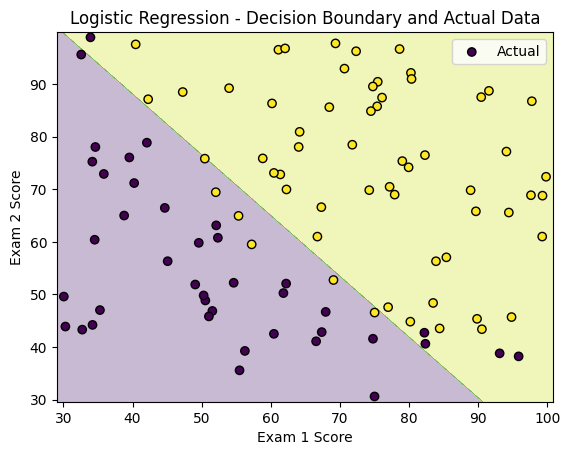

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a mesh grid of points to plot the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# Scatter plot for actual data points
plt.scatter(X['Exam_1'], X['Exam_2'], c=y, cmap='viridis', edgecolors='k', marker='o', label='Actual')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Logistic Regression - Decision Boundary and Actual Data')
plt.legend()
plt.show()


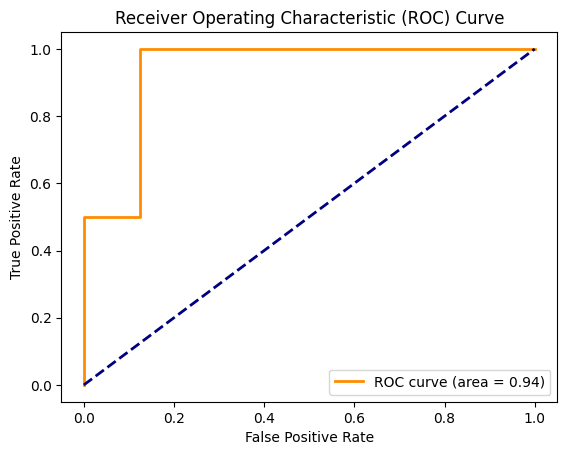

In [29]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


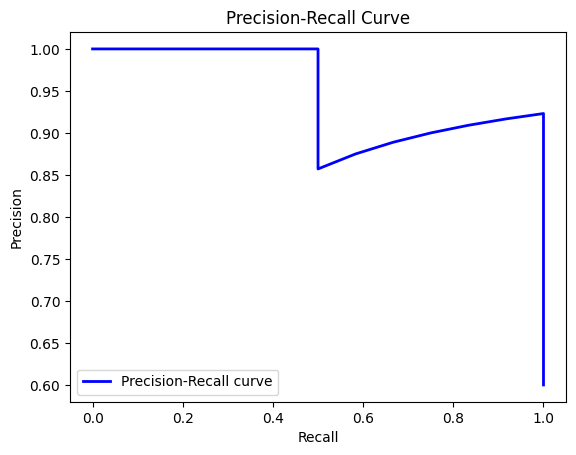

In [30]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


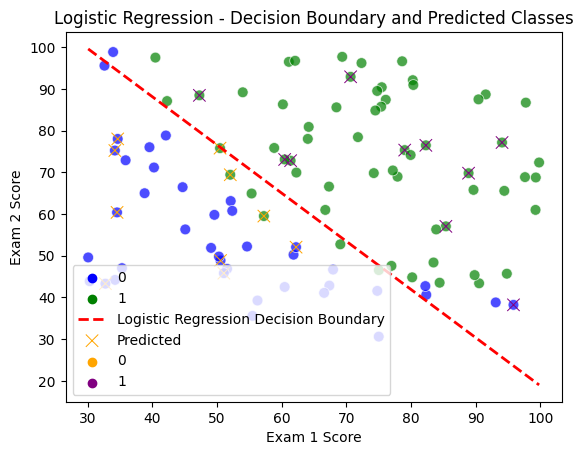

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual data points
sns.scatterplot(x='Exam_1', y='Exam_2', hue='Admitted', data=data, palette={0: 'blue', 1: 'green'}, marker='o', s=60, alpha=0.7)

# Plot decision boundary
x_values = np.linspace(X['Exam_1'].min(), X['Exam_1'].max(), 100)
y_values = -(model.coef_[0][0] * x_values + model.intercept_) / model.coef_[0][1]
plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=2, label='Logistic Regression Decision Boundary')

# Scatter plot for predicted classes
sns.scatterplot(x=X_test['Exam_1'], y=X_test['Exam_2'], hue=y_pred, palette={0: 'orange', 1: 'purple'}, marker='x', s=80, label='Predicted')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Logistic Regression - Decision Boundary and Predicted Classes')
plt.legend()
plt.show()


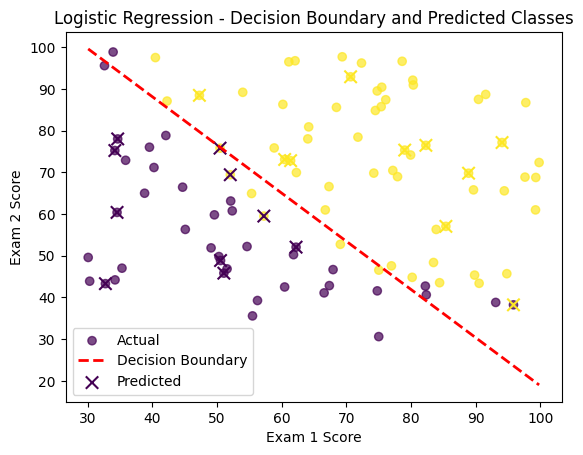

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot for actual data points
plt.scatter(X['Exam_1'], X['Exam_2'], c=y, cmap='viridis', marker='o', label='Actual', alpha=0.7)

# Plot decision boundary
x_values = np.linspace(X['Exam_1'].min(), X['Exam_1'].max(), 100)
y_values = -(model.coef_[0][0] * x_values + model.intercept_) / model.coef_[0][1]
plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=2, label='Decision Boundary')

# Scatter plot for predicted classes
plt.scatter(X_test['Exam_1'], X_test['Exam_2'], c=y_pred, cmap='viridis', marker='x', s=80, label='Predicted')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Logistic Regression - Decision Boundary and Predicted Classes')
plt.legend()
plt.show()
